- 컴퓨터에서 이미지가 표현되는 방식을 이해
- Pillow와 OpenCV로 Python에서 이미지 파일 열고 정보 추출
- CIFAR-100에서 히스토그램을 기반으로 유사한 이미지 고르기

In [12]:
import os
import pickle
import numpy as np
from PIL import Image

### Pillow 사용법

- 이미지 생성

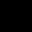

In [4]:
data = np.zeros([32,32,3],dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

현재 모든 픽셀의 모든 채널값이 0으로 되어있으므로 검정색이 나왔다.

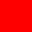

In [5]:
data[:, :] = [255,0,0]
image = Image.fromarray(data,'RGB')
image

- 연습용 이미지를 열어 width와 height 출력 및 jpg 포맷으로 저장해보자

In [3]:
#파일 경로
image_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice.png'

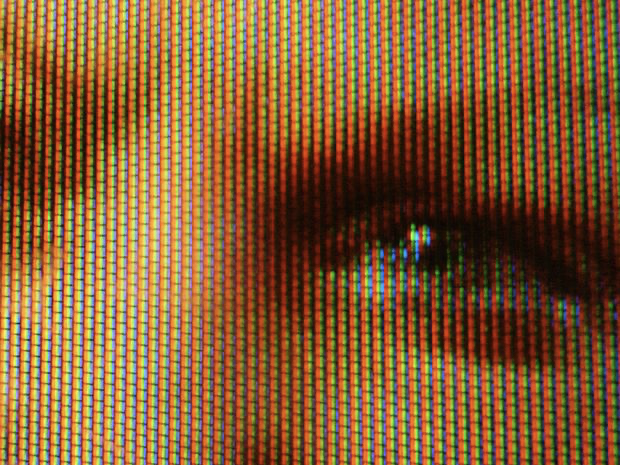

In [5]:
#이미지 열기
image = Image.open(image_path)
image

In [6]:
print(image.width)
print(image.height)

620
465


In [8]:
#저장
new_image = os.getenv('HOME') + '/aiffel/python_image_proc/data/jpg_pillow_practice.jpg'
image = image.convert('RGB')
image.save(new_image)

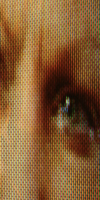

In [10]:
#Image resize
resized_image = image.resize((100,200))
resized_image_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice_resized.png'
resized_image.save(resized_image_path)
resized_image

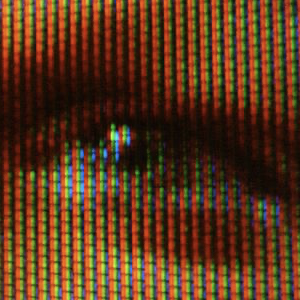

In [11]:
#Image crop
region = image.crop((300,100,600,400))

cropped_image_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice_cropped.png'
region.save(cropped_image_path)
region

### Pillow 를 활용한 데이터 전처리

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))

<class 'dict'>


- 딕셔너리 객체인 것을 확인할 수 있다.

In [16]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [17]:
type(train[b'filenames'])

list

In [18]:
train[b'filenames'][:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [20]:
train[b'data'][0].shape

#32x32x3

(3072,)

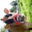

In [22]:
# Pillow 를 사용하여 Numpy 배열을 Image 객체로 만들어서 화면에 띄운 것
image_data = train[b'data'][0].reshape([32,32,3], order='F')
image = Image.fromarray(image_data)
image

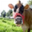

In [23]:
# x=축 ,y축이 뒤집어져 나왔으므로 축을 바꿔주자
image_data = image_data.swapaxes(0,1)
image = Image.fromarray(image_data)
image

- 이 방식으로 모든 이미지를 생성해보자

In [24]:
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        # [[YOUR CODE]]
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32,32,3], order='F')
        image = Image.fromarray(data.swapaxes(0,1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:21<00:00, 2368.78it/s]
